# My Body Weight Web Application

## Introduction
This part briefly explains the objectives of this project.
I was fat for as long as I could remember before 2014, my body weight was constantly over 230lbs and reached a peak over 250lbs in the year of 2014.  
Thats when I finally decided to lose weight.
I did lots of researches online and tried out so many different stuff myself and finally successfully lost 100 lbs in a year and began my fitness journey ever since.   
I got my personal trainer certificate from American Council on Exercise (ACE) and I am a certifited nutritional specialist from ACE as well. I learned how to be fit and stay fit.   
Thats when I started to monitor my body weight constantly. I lost a year or two of body weight data initially because I was using another app.   
After doing the last project which is just for exploratory purposes, now I believe I can use my newly learned skills to build a web application of my own to do the job where I would do manually automatically for me.
Below is a picture of my personal body transformation of before and after. Check it out!!

<img src="https://raw.githubusercontent.com/DericMei/Body-Weight-Project/main/Pictures/IMG_0260.JPG" width="800" height="500"/>

## Background Knowledge

One kg of pure fat is equal to 7700 calories. For cutting, which is a fancy way for bodybuilders to say weight loss, normally the best way to track progress is to follow the steps below:
1. Record body weight every morning after waking up after peeing before drinking water (for consistency).
2. Calculate weekly average body weight after a whole week.
3. Compare the weekly average after every week with the data from last week.
4. Calculate the difference and use this kg value to multiply 7700 to know exactly how much caloric deficit one is in.
There is no easy to use app in the market right now that I could find that does this job easily. Every year, after winter, when I am in my normal cutting phase, I will have to manually record my body weight everyday, set a day point for weekly summary, and every week, calculate my weekly average and manually do all the calculations to figure out if I am on the right track of cutting. This is extremely painful for me. Now with the knowledge I have right now, I could build this perfect web application for myself that does the job for me. Hope you can learn something from this if you want to lose some weight!

Example:
Say if my weekly average for last week is 80kg, and 79.5kg for this week, then the difference is 0.5kg, using it to multiply 7700 calories, I get 3350 calories. This means that over the past week, my caloric defict is roughtly around this number, I can further use this number to calculate daily caloric deficit, where I can get roughly 500 calories. This is a good amount. Right now I am trying to stay at around 800 calories daily caloric deficit and I haven't manually calculated yet since I am too lazy. Hope this project can help me find out!!!!

## Objectives

Eventually, for this project, I want to create a web application where I can record my body weight everyday and making it calculate my weekly averages, monthly averages, showing trends with a dashboard, and possibly come up with insights for me to see. For a cutting phase, I would normally do all these every week manually in order to understand how my cut is going.
For the web application, I need it to have the following functions:
- Record daily weight (A place I can enter my daily weight)
- It will auto update the cloud database where I store all my body weight data after entering body weight each day (or by auto updating the latest record if not manually entered, in case I forget to enter)
    - This is what I would do in practice and what I recommend everyone does when you are cutting, for better result and more consistant recording.
- It will show a weekly summary for the week I am in to display my weekly average body weight, and the difference comparing to last week. 
    - It contains summarize wording to show weekly average for the current week at this moment.
    - It shows the weekly average for the last week to compare
    - It shows the difference between last week's average and this week's average and makes a comment about it
    
    


## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import sqlite3
from sqlite3 import Error
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

/var/folders/r4/2nk84h69255dy1q5js59_1b40000gn/T/ipykernel_76711/365623870.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Cleaning

In [2]:
# Read in data
filepath = 'bodyweight.csv'
df = pd.read_csv(filepath)
df.head()

,type,sourceName,sourceVersion,productType,device,startDate,endDate,unit,value,HKWasUserEntered,HKExternalUUID
0,HKQuantityTypeIdentifierBodyMass,Health,10.0.2,"iPhone8,2",NaN,2016-09-28 18:24:46 +0000,2016-09-28 18:24:46 +0000,kg,77.110640,NaN,NaN
1,HKQuantityTypeIdentifierBodyMass,Zijie的 iPhone,11.1.2,"iPhone10,3",NaN,2017-12-18 06:09:09 +0000,2017-12-18 06:09:09 +0000,kg,80.000000,NaN,NaN
2,HKQuantityTypeIdentifierBodyMass,Zijie的 iPhone,11.2.2,"iPhone10,3",NaN,2018-04-26 01:38:50 +0000,2018-04-26 01:38:50 +0000,kg,83.000000,NaN,NaN
3,HKQuantityTypeIdentifierBodyMass,Zijie的 iPhone,11.2.2,"iPhone10,3",NaN,2018-05-07 17:26:47 +0000,2018-05-07 17:26:47 +0000,kg,83.000000,NaN,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,11.3.1,"iPhone10,3",NaN,2018-05-08 23:53:00 +0000,2018-05-08 23:53:00 +0000,kg,82.372374,1.0,NaN


In [3]:
# since I am only interested in the date and weight I am only keeping these 2 rows
df = df[['startDate', 'value']]

# renaming columns
df = df.rename(columns={'startDate': 'date', 'value': 'weight'})

# changing the formate of the date column
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
df

,date,weight
0,2016-09-28,77.110640
1,2017-12-18,80.000000
2,2018-04-26,83.000000
3,2018-05-07,83.000000
4,2018-05-08,82.372374
...,...,...
1534,2024-01-20,85.400101
1535,2024-01-21,85.299860
1536,2024-01-22,85.400101
1537,2024-01-23,86.300032


In [4]:
# Creating a function to plot weight over time easily later when cleaning up data

def plot_weight_over_time(df):
    # Make a copy of the dataframe to ensure the original data is not affected
    df_plot = df.copy()

    # Convert the 'date' column to datetime if it's not already
    df_plot['date'] = pd.to_datetime(df_plot['date'])
    
    # Ensure that the 'date' column is the index of the DataFrame for time series plotting
    df_plot.set_index('date', inplace=True)

    # Sort the DataFrame by the index (date) to ensure correct plotting
    df_plot.sort_index(inplace=True)

    # Plotting the data
    plt.figure(figsize=(15, 5))  # Adjust the size as needed
    plt.plot(df_plot.index, df_plot['weight'], marker='o', linestyle='-', color='green')

    # Improving the aesthetics
    plt.title('Weight Over Time')
    plt.xlabel('Date')
    plt.ylabel('Weight (kg)')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotates the date labels to avoid overlap

    # Handling missing values by breaking the line at missing dates
    plt.gca().set_prop_cycle(None)  # Reset the color cycle to reuse the first color

    # Show only the points where the 'weight' is not missing
    for date, weight in df_plot.dropna().iterrows():
        plt.plot(date, weight, marker='o', linestyle='', color='red')

    # Show the plot
    plt.tight_layout()  # Adjust subplot params so that the subplot(s) fits in to the figure area.
    plt.show()

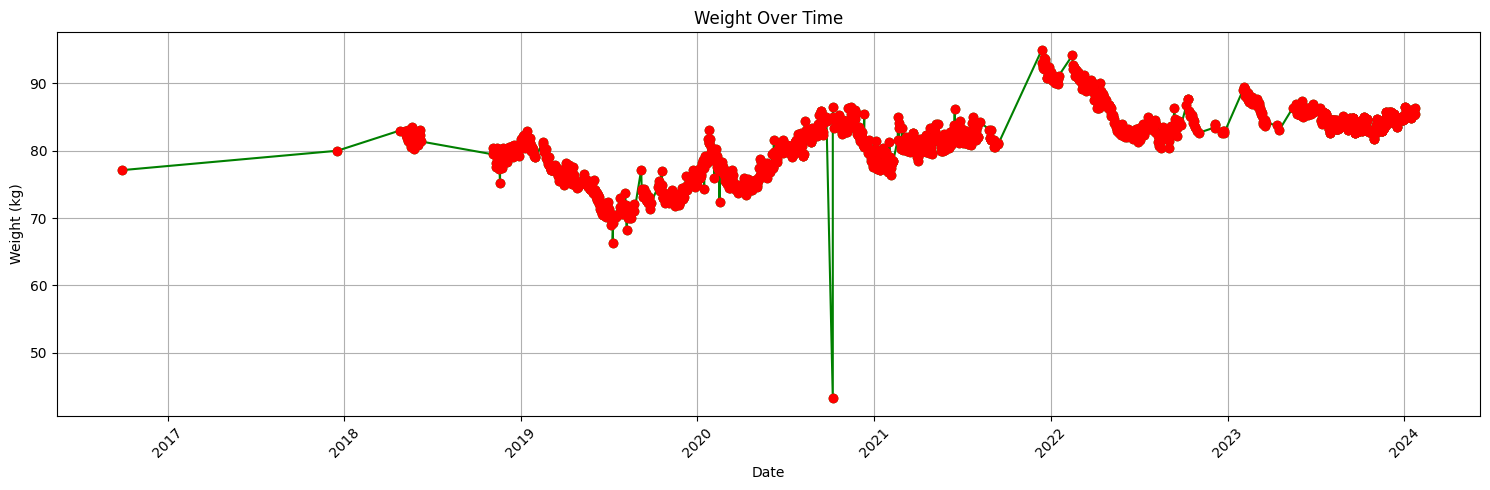

In [5]:
plot_weight_over_time(df)

There are tons of missing values here, shame on me for not recording consistantly T_T.
To handle these data and make my model more consistant, I need to do some processing with these data. 
- First I cannot seem to use any data before spring of 2018 because there is only 2 data points. 
- Second, there is one outlier in later 2020 where I recorded about 40 kg for my date, I think it might just be a typo when I was recording.
- Then because of some missing value in the middle here and there, I need to find a logic to fill up those missing values to make data more consistant.

In [6]:
# Droping first 2 data points
df = df.drop(df.index[0:2])

# Droping the low data point in late 2020
df = df[df['weight'] > 50]

In [7]:
# write a function to fill in all the missing values for weight to make sure there is a weight value for each date.
# Basic logic here is for any missing weight, find the last recorded date and nearest next record and fill in with the linear relationship using the pandas interpolate function.

def fill_missing_values_with_interpolation(df, date_column='date', value_column='weight'):

    df_new = df.copy()

    # Ensure that 'date' is a datetime column
    df_new[date_column] = pd.to_datetime(df_new[date_column])
    
    # Drop duplicates, keeping only the first entry for each date
    df_new = df_new.drop_duplicates(subset=date_column)
    
    # Set 'date' as the DataFrame index
    df_new.set_index(date_column, inplace=True)
    
    # Create a continuous date range from the start date to the end date
    full_date_range = pd.date_range(start=df_new.index.min(), end=df_new.index.max(), freq='D')
    
    # Reindex the DataFrame with the full date range
    df_new = df_new.reindex(full_date_range)
    
    # Interpolate missing 'weight' values using a time-weighted method
    df_new[value_column] = df_new[value_column].interpolate(method='time')
    
    # Reset the index to turn the 'date' back into a column
    df_new.reset_index(inplace=True)
    
    # Rename the index back to 'date'
    df_new.rename(columns={'index': date_column}, inplace=True)
    
    return df_new

In [8]:
# use the function to create a new dataframe that has continuous weight data
df_final = fill_missing_values_with_interpolation(df)

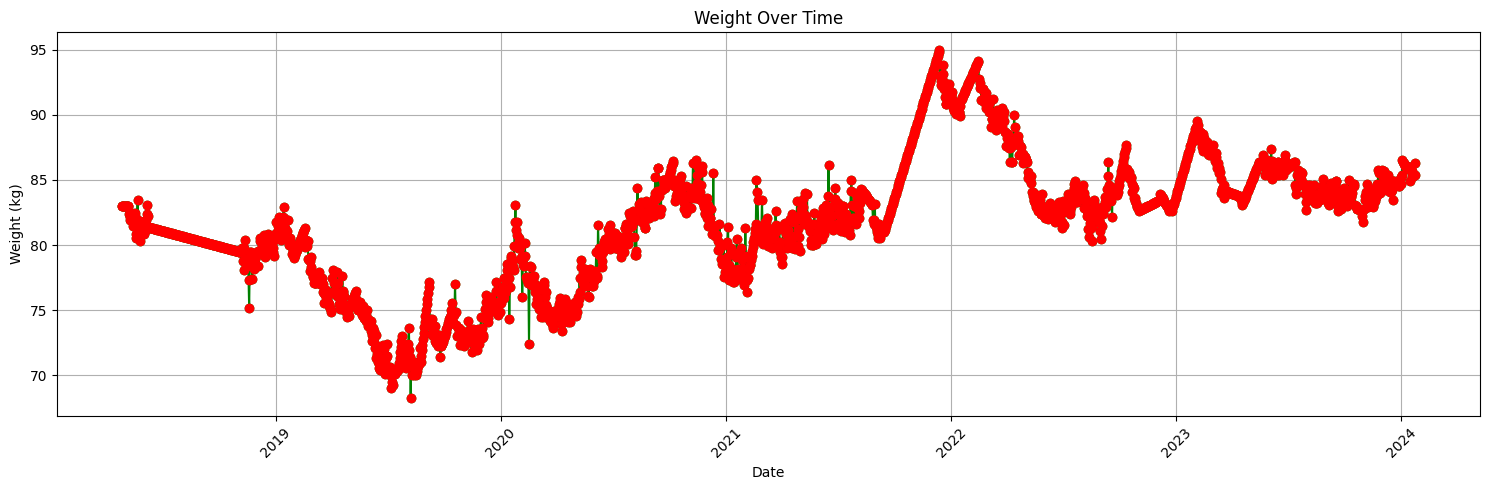

In [9]:
# plotting the dataframe to see if it is correct
plot_weight_over_time(df_final)

In [10]:
df_final.head()

,date,weight
0,2018-04-26,83.0
1,2018-04-27,83.0
2,2018-04-28,83.0
3,2018-04-29,83.0
4,2018-04-30,83.0


In [11]:
len(df_final)

2100

From the plot, it is pretty clear that all the issues has been fixed, and the data is already been cleaned up. Now I am ready to move on to the next stage.

## Create SQLite database

### Functions

In [12]:
# Function to create a database connection
def create_connection(db_file):
    """Create a database connection to a SQLite database."""
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established to database:", db_file)
    except Error as e:
        print(e)
    return conn

In [13]:
# Function to create a table
def create_table(conn, create_table_sql):
    """Create a table from the create_table_sql statement."""
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
        print("Table created successfully")
    except Error as e:
        print(e)

In [14]:
# Function to delete all records in my database when inserting
def delete_all_records(conn, table_name):
    """
    Delete all rows in the given table.
    """
    sql = f'DELETE FROM {table_name};'
    try:
        cur = conn.cursor()
        cur.execute(sql)
        conn.commit()
        print("All records deleted successfully")
    except Exception as e:
        print(f"An error occurred: {e}")

### Create SQLite database, table and insert data

In [15]:
# Create the database and the table
database = "my_weight_tracker.db"

sql_create_weight_records_table = """ CREATE TABLE IF NOT EXISTS weight_records (
                                        date text NOT NULL,
                                        weight real NOT NULL
                                    ); """

conn = create_connection(database)

if conn is not None:
    create_table(conn, sql_create_weight_records_table)
else:
    print("Error! cannot create the database connection.")

Connection established to database: my_weight_tracker.db
Table created successfully


In [16]:
# Delete all records in the database table
delete_all_records(conn, 'weight_records')

All records deleted successfully


In [17]:
# To make sure date column stays consistent when imported into database
df_final['date'] = pd.to_datetime(df_final['date']).dt.date
# Using pandas to import data into the sqlite database just created
df_final.to_sql('weight_records', conn, if_exists='append', index=False)

2100

In [18]:
# Verifing data insertion
pd.read_sql_query("SELECT * FROM weight_records", conn)


,date,weight
0,2018-04-26,83.000000
1,2018-04-27,83.000000
2,2018-04-28,83.000000
3,2018-04-29,83.000000
4,2018-04-30,83.000000
...,...,...
2095,2024-01-20,85.400101
2096,2024-01-21,85.299860
2097,2024-01-22,85.400101
2098,2024-01-23,86.300032


Now the database table looks good to go!
After investigations, SQLite does not support cloud services, I need to migrate my data into a cloud server database in order to make this application work.
I am going with PostgreSQL.

## PostgreSQL database, table, and inserting data

In [19]:
# Load the current environment variables
load_dotenv()
# Get credentials to connect
database_url = os.getenv('DATABASE_URL')
# Create the engine to connect to the PostgreSQL cloud database
engine = create_engine(database_url)

In [20]:
# Create the table and insert all my data to the database
df_final.to_sql('weight_records', engine, if_exists='replace', index=False)

100

In [21]:
# Verifing data insertion
pd.read_sql_query("SELECT * FROM weight_records", engine)

,date,weight
0,2018-04-26,83.000000
1,2018-04-27,83.000000
2,2018-04-28,83.000000
3,2018-04-29,83.000000
4,2018-04-30,83.000000
...,...,...
2095,2024-01-20,85.400101
2096,2024-01-21,85.299860
2097,2024-01-22,85.400101
2098,2024-01-23,86.300032


My first Cloud based SQL database is good to go!!!!!!!!! So excited!!!

Now, work is done here with jupyter notebook, time to move on to the .py file to create my dash application.